# Extracellular node frequency analysis: HemeThrombKG - pathway overlay

This notebook overlays extracellular nodes from the hemeThrombKG and coagulation pathways where node sizes reflect their frequency in the HemeThrombKG.

In [1]:
import getpass
import sys
import time

import igraph
import pandas as pd
import pybel

from network_utils import get_bel_graph, get_node_counts, render_graph

/Users/sarahmubeen/Library/Python/3.10/lib/python/site-packages/pybel/struct/operations.py:8: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
sys.version

'3.10.0 (v3.10.0:b494f5935c, Oct  4 2021, 14:59:20) [Clang 12.0.5 (clang-1205.0.22.11)]'

In [3]:
getpass.getuser()

'sarahmubeen'

In [4]:
time.asctime()

'Thu Jul  7 19:08:19 2022'

In [5]:
pybel.get_version()

'0.15.5'

### Load HemeThrombKG

In [6]:
review_kg = pybel.from_bel_script('../bel_files/hemeThrombKG.bel')

downloading namespaces:   0%|          | 0/20 [00:00<?, ?it/s]

downloading annotations:   0%|          | 0/11 [00:00<?, ?it/s]

### Load pathways


In [7]:
coagulation_pathway = get_bel_graph('coagulation_pathways')
intrinsic_pathway = get_bel_graph('intrinsic_pathway_reactome')
extrinsic_pathway = get_bel_graph('extrinsic_pathway_reactome')
common_pathway = get_bel_graph('common_pathway_reactome')

### Load EC proteins

In [8]:
extracellular_proteins_df = pd.read_csv('../node_type_files/extracellular_proteins.tsv', sep='\t', header=None)
ec_proteins_list = extracellular_proteins_df[0].to_list()

### Merge graphs

In [9]:
# Merge review and coagulation pathways graph
review_coagulation_graph = pybel.union([review_kg, coagulation_pathway])

# Merge review and extrinsic pathway graph
review_extrinsic_graph = pybel.union([review_kg, extrinsic_pathway])

# Merge review and intrinsic pathway graph
review_intrinsic_graph = pybel.union([review_kg, intrinsic_pathway])

# Merge review and common pathway graph
review_common_graph = pybel.union([review_kg, common_pathway])


### Normalize node size values 

In [10]:
normalize_vals_dict = {'actual': {'lower': 1, 'upper': 64}, 'desired': {'lower': 1, 'upper': 20}}

# Render graphs

### Coagulation pathways -  HemeThrombKG

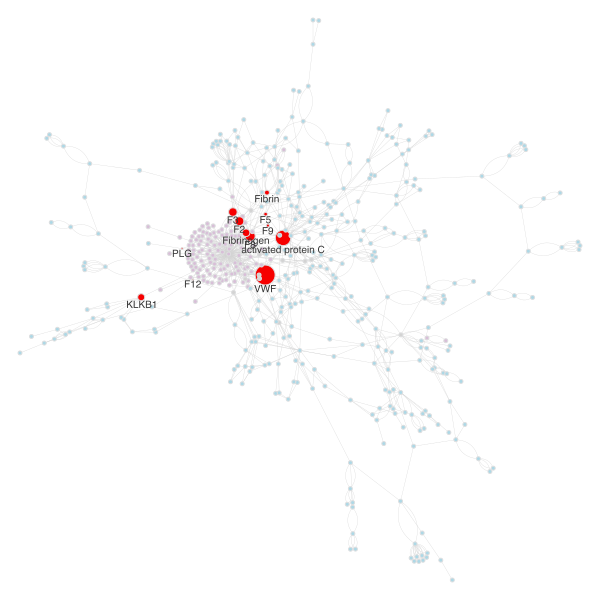

In [11]:
coagulation_graph, visual_style = render_graph(
    review_coagulation_graph, 
    coagulation_pathway, 
    review_kg, 
    ec_proteins_list,
    normalize_vals_dict,
    intracellular=False,
)

layout = coagulation_graph.layout("fr")
igraph.plot(coagulation_graph, layout=layout, **visual_style)

### Extrinsic pathway - HemeThrombKG 

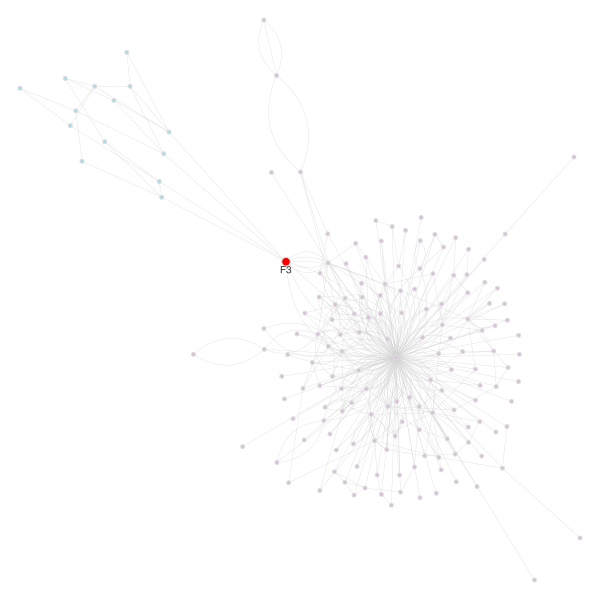

In [12]:
extrinsic_graph, visual_style = render_graph(
    review_extrinsic_graph, 
    extrinsic_pathway, 
    review_kg, 
    ec_proteins_list,
    normalize_vals_dict,
    intracellular=False,
)

layout = extrinsic_graph.layout("fr")
igraph.plot(extrinsic_graph, layout=layout, **visual_style)

### Intrinsic pathway -  HemeThrombKG 

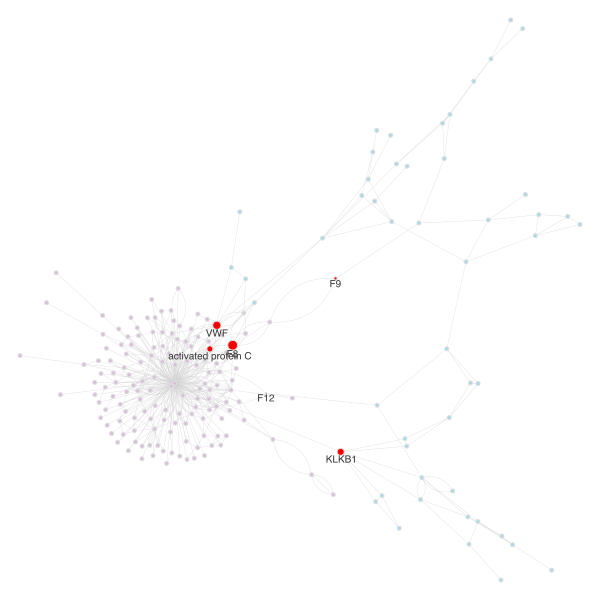

In [13]:
intrinsic_graph, visual_style = render_graph(
    review_intrinsic_graph, 
    intrinsic_pathway, 
    review_kg, 
    ec_proteins_list,
    normalize_vals_dict,
    intracellular=False,
)

layout = intrinsic_graph.layout("fr")
igraph.plot(intrinsic_graph, layout=layout, **visual_style)

### Common pathway - HemeThrombKG

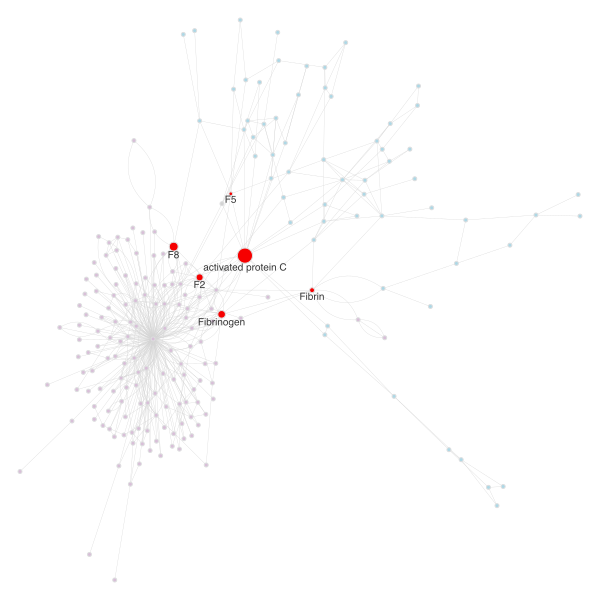

In [14]:
common_graph, visual_style = render_graph(
    review_common_graph, 
    common_pathway, 
    review_kg, 
    ec_proteins_list,
    normalize_vals_dict,
    intracellular=False,
)

layout = common_graph.layout("fr")
igraph.plot(common_graph, layout=layout, **visual_style)